In [1]:
# now read in the new function
from Helpers import x_y_split, read_dataframe, extract_cat_features,minus_1_imputer, most_frequent_imputer
from Preprocessing import preprocessor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = read_dataframe(path = 'train.csv')
x, y = x_y_split(df=train)
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
p = preprocessor(cols_to_filter=['1stFlrSF','Id',
 '3SsnPorch',
 'Alley',
 'BldgType',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtHalfBath',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Functional',
 'GarageCars',
 'GarageCond',
 'GarageType',
 'GarageYrBlt',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'LandContour',
 'LandSlope',
 'LowQualFinSF',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'TotRmsAbvGrd',
 'Utilities',
 'YrSold'],                 
                cols_to_impute_minus_1 = ['LotFrontage','FireplaceQu', 
                                     'GarageFinish', 'GarageQual', 'MasVnrType'],
                cols_to_impute_most_frequent = ['MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure', 
                                     'GarageFinish', 'GarageQual', 'MasVnrType','OverallCond'])
                


In [4]:
x_transformed = p.fit_transform(x)
x_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,1,0,0,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,1,0,0,0,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,1,0,0,0,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,1,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,1,0,0,0,0,1,0,0


In [5]:
assert all(x_transformed.isna().sum() == 0)

## GradientBoosting - Parameter Tuning 

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
from sklearn.ensemble import GradientBoostingRegressor

In [8]:
import xgboost as xgb

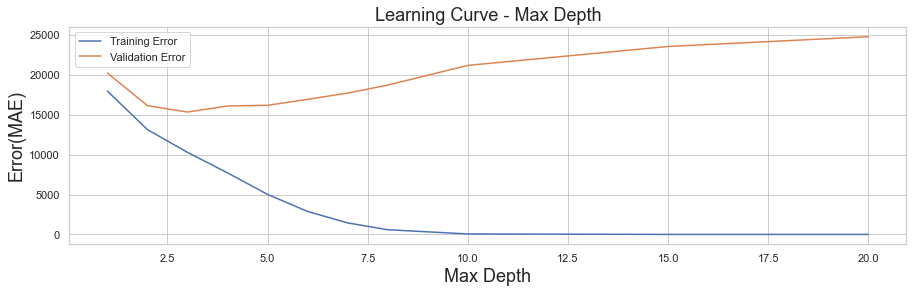


Min Validation MAE:  15341.572896814669


,max_depth,train_error,validation_error
0,1,17965.897557,20231.621771
1,2,13142.461398,16142.054523
2,3,10289.048487,15341.572897
3,4,7714.933181,16101.628379
4,5,5018.416769,16185.821780
5,6,2877.664050,16933.735629
6,7,1444.553157,17716.805503
7,8,590.007005,18718.004399
8,10,59.877425,21187.702727
9,15,1.604582,23559.499525


In [9]:
results = []

x_train, x_val, y_train, y_val = train_test_split(x_transformed, y, test_size = 0.333, random_state = 365, shuffle = True)

# Iterate through all possiblities
for max_depth in [1,2,3,4,5,6,7,8,10,15,20]:
    model = GradientBoostingRegressor(max_depth = max_depth)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_val)
    results.append({
        'max_depth':max_depth,
        'train_error':mean_absolute_error(y_train, predictions_train),
        'validation_error':mean_absolute_error(y_val, predictions_val)
    })

# Summarize Error for each possibility in a DF
summary_df = pd.DataFrame(results)

# Plot Learning Curves
plt.figure(figsize=(15,4))
plt.plot(summary_df['max_depth'], summary_df['train_error'], label = 'Training Error')
plt.plot(summary_df['max_depth'], summary_df['validation_error'], label = 'Validation Error')
plt.xlabel('Max Depth', size = 18)
plt.ylabel('Error(MAE)', size = 18)
plt.title('Learning Curve - Max Depth', size = 18)
plt.legend()
plt.show()


print('\nMin Validation MAE: ', summary_df['validation_error'].min())
summary_df

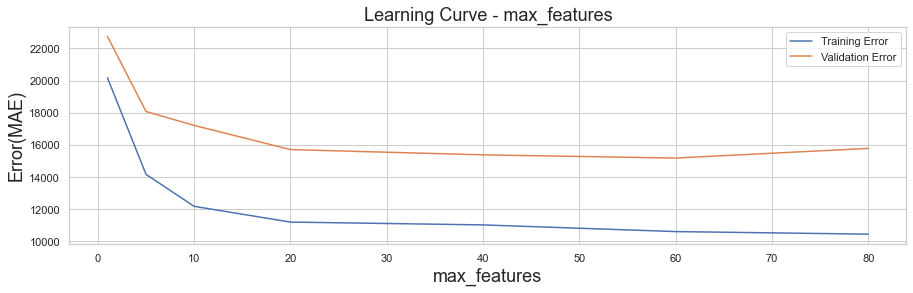


Min Validation MAE:  15179.129100844913


,max_features,train_error,validation_error
0,1.0,20169.275941,22744.583932
1,5.0,14163.512864,18076.356223
2,10.0,12175.085775,17210.454785
3,20.0,11195.575611,15707.086593
4,40.0,11019.985499,15378.969439
5,60.0,10604.330801,15179.129101
6,80.0,10444.507515,15780.156254
7,NaN,10289.048487,15384.761041


In [10]:
results = []

# Iterate through all possiblities
for max_features in [1,5,10,20,40,60,80,None]:
    model = GradientBoostingRegressor(max_features = max_features)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_val)
    results.append({
        'max_features':max_features,
        'train_error':mean_absolute_error(y_train, predictions_train),
        'validation_error':mean_absolute_error(y_val, predictions_val)
    })

# Summarize Error for each possibility in a DF
summary_df = pd.DataFrame(results)

# Plot Learning Curves
plt.figure(figsize=(15,4))
plt.plot(summary_df['max_features'], summary_df['train_error'], label = 'Training Error')
plt.plot(summary_df['max_features'], summary_df['validation_error'], label = 'Validation Error')
plt.xlabel('max_features', size = 18)
plt.ylabel('Error(MAE)', size = 18)
plt.title('Learning Curve - max_features', size = 18)
plt.legend()
plt.show()


print('\nMin Validation MAE: ', summary_df['validation_error'].min())
summary_df

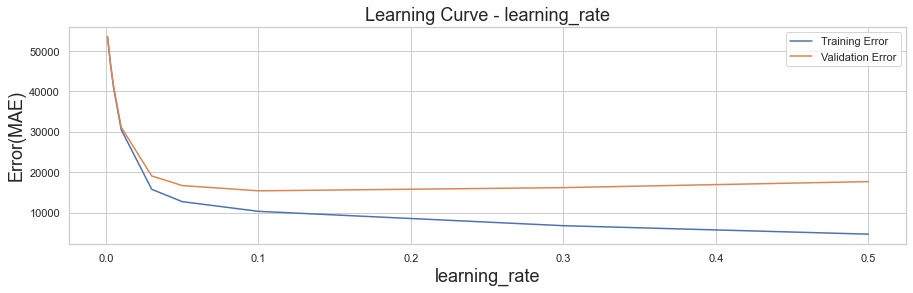


Min Validation MAE:  15374.301222561544


,learning_rate,train_error,validation_error
0,0.001,53597.429015,53631.299545
1,0.003,46667.218318,46849.248860
2,0.005,40937.877787,41211.304561
3,0.010,30534.228857,31153.636154
4,0.030,15750.412626,19056.051689
5,0.050,12696.303594,16680.018962
6,0.100,10289.048487,15374.301223
7,0.300,6733.850929,16168.127552
8,0.500,4636.616655,17658.998508


In [11]:
results = []

# Iterate through all possiblities
for learning_rate in [0.001,0.003,0.005, 0.01, 0.03,0.05, 0.1, 0.3,0.5]:
    model = GradientBoostingRegressor(learning_rate = learning_rate)
    model.fit(x_train, y_train)
    predictions_train = model.predict(x_train)
    predictions_val = model.predict(x_val)
    results.append({
        'learning_rate':learning_rate,
        'train_error':mean_absolute_error(y_train, predictions_train),
        'validation_error':mean_absolute_error(y_val, predictions_val)
    })

# Summarize Error for each possibility in a DF
summary_df = pd.DataFrame(results)

# Plot Learning Curves
plt.figure(figsize = (15,4))
plt.plot(summary_df['learning_rate'], summary_df['train_error'], label = 'Training Error')
plt.plot(summary_df['learning_rate'], summary_df['validation_error'], label = 'Validation Error')
plt.xlabel('learning_rate', size = 18)
plt.ylabel('Error(MAE)', size = 18)
plt.title('Learning Curve - learning_rate', size = 18)
plt.legend()
plt.show()

print('\nMin Validation MAE: ', summary_df['validation_error'].min())
summary_df

- learning_rate = [0.05,0.1,0.3]

In [ ]:
model = GradientBoostingRegressor(n_estimators=1000)

# Define Parameters
param_grid = {"max_depth": [1,2,3,4,5,6,7,8],
              "learning_rate":[0.05,0.1,0.3,0.5],
              "max_features": [40,50,60,70,80,None],
              }

gs_cv = GridSearchCV(model, param_grid=param_grid, cv = 3, verbose=10, n_jobs=-1 ).fit(x_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

In [ ]:
gs_cv.best_estimator_

In [ ]:
gs_cv.best_params_

In [ ]:
gs_cv.best_score_

In [ ]:
predictions = gs_cv.predict(x_val)

In [ ]:
mean_absolute_error(y_val, predictions)

In [ ]:
r2_score(y_val, predictions)

In [ ]:
y_val = np.array(y_val)

In [ ]:
summary_df = pd.DataFrame(predictions, columns = ['Prediction'])

In [ ]:
summary_df['Actual'] = y_val
summary_df['Difference'] = predictions - y_val
summary_df['Difference(%)'] = np.abs(predictions - y_val) / y_val

In [ ]:
summary_df.describe()